## Cuarta actividad evaluativa

Profesor Alfonso Cervantes Barragán - 05-10-2020

Universidad Sergio Arboleda - Informatica III

### Descripción del contexto.

En esta actividad el estudiante debera realizar un análisis exploratorio de Datos (EDA) del dataset *ventas-de-juegos.csv*, que contiene información sobre videos juegos vendidos que superarion las 100 000 copias.  

La siguiente tabla contiene la descripción de las columnas:

|Columna |	Descripción |  
|--------|--------------|
|Rank|Ranking sobre las ventas totales |   
|Name| Nombre del juego|   
|Platform |	Plataforma mediante la cual fue dado a conocer el juego| 
|year |	año en el que se dio a conocer el juego|   
|genre |genero del juego |  
|Publisher |	editor del juego |  
|NA_sales |Ventas en Norte America (en millones) |  
|EU_sales |Ventas en Europa (en millones) | 
|JP_sales| ventas en Japón (en millones) |  
|Other_sales| ventas en el resto del mundo (en millones)|
|Global_sales|ventas totales en el mundo|


#### Entregable

El estudiante debera entregar un documento con extensión *ipynb* mediante el taller "Cuarta Evaluación " que se encuentra en el curso virtual Informatica III en el plataforma Sergio Virtual


#### Plazo

El plazo de entrega sera hasta el sabado, 24 de octubre a las 11:30 p.m. En el aula del curso en la plataforma Sergio Virtual estará disponible un taller en el cual deberan subir el archivo .ipynb (Jupyter notebook) con todo el código requerido. 

No esta permitido resolver los ejercicios a mano ni ingresar la respuesta sin que haya un código que lo respalde.

#### Donde puedo trabajar?

Este ejercicio se puede realizar en el entorno virtual creado con base en el repositorio github.com/alfonsocerv/datascience en la carpeta /ejericicio/caso6.

#### Criterios de evaluación

1. Todo el código requerido debe estar presente. Cada ejercicio debe tener su respectiva respuesta.
2. No pueden haber errores que se generen al ejecutar el código.
3. El código debe cumplir con las especificaciones de cada ejercicio.

### Ejercicio 1

Importa las librerias pandas, numpy, matplotlib y seaborn

#### Respuesta

In [17]:
%matplotlib inline

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Ejercicio 2
Lea la base de datos *ventas-de-juegos.csv* y guardelo en un dataframe llamado *df*. Luego muestre los 5 primeros registros.
#### Respuesta

In [19]:
df = pd.read_csv('ventas-de-juegos.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### Ejercicio 3
Muestre las dimensiones del dataframe
#### Respuesta

In [20]:
print('Dimensiones del dataframe: ', df.shape)

Dimensiones del dataframe:  (16598, 11)


###Ejercicio 4
Realice una descripción general del dataframe.
####Respuesta

In [21]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


### Ejercicio 5
Muestre el tipo de dato de cada columna del dataframe
#### Respuesta

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Se puede ver que algunas columnas tienen valores nulos. 

### Ejercicio 6
Inspeccionemos cuántos nulos hay por columna y qué porcentaje representa.
#### Respuesta

In [24]:
null_perc = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
null_perc.columns = ['Columna', 'Porcentaje de nulos']
null_values = pd.DataFrame(df.isnull().sum()).reset_index()
null_values.columns = ['Columna', 'Cant. valores nulos']
null_vgd = pd.merge(null_values, null_perc, on='Columna')
null_vgd

,Columna,Cant. valores nulos,Porcentaje de nulos
0,Rank,0,0.000000
1,Name,0,0.000000
2,Platform,0,0.000000
3,Year,271,1.632727
4,Genre,0,0.000000
5,Publisher,58,0.349440
6,NA_Sales,0,0.000000
7,EU_Sales,0,0.000000
8,JP_Sales,0,0.000000
9,Other_Sales,0,0.000000


### Ejercicio 7
Muestre el número de juegos, editores, plataformas y géneros distintos que existen en esta base de datos.
#### Respuesta

In [25]:
print('Cantidad de juegos distintos:', df['Name'].nunique())
print('Cantidad de editores de juegos distintos:', df['Publisher'].nunique())
print('Cantidad de plataformas distintas:', df['Platform'].nunique())
print('Cantidad de géneros distintos:', df['Genre'].nunique())

Cantidad de juegos distintos: 11493
Cantidad de editores de juegos distintos: 578
Cantidad de plataformas distintas: 31
Cantidad de géneros distintos: 12


### Ejercicio 8
Utilice un diagrama de barras para mostrar el número de videojuegos dados a conocer en cada año.
#### Respuesta

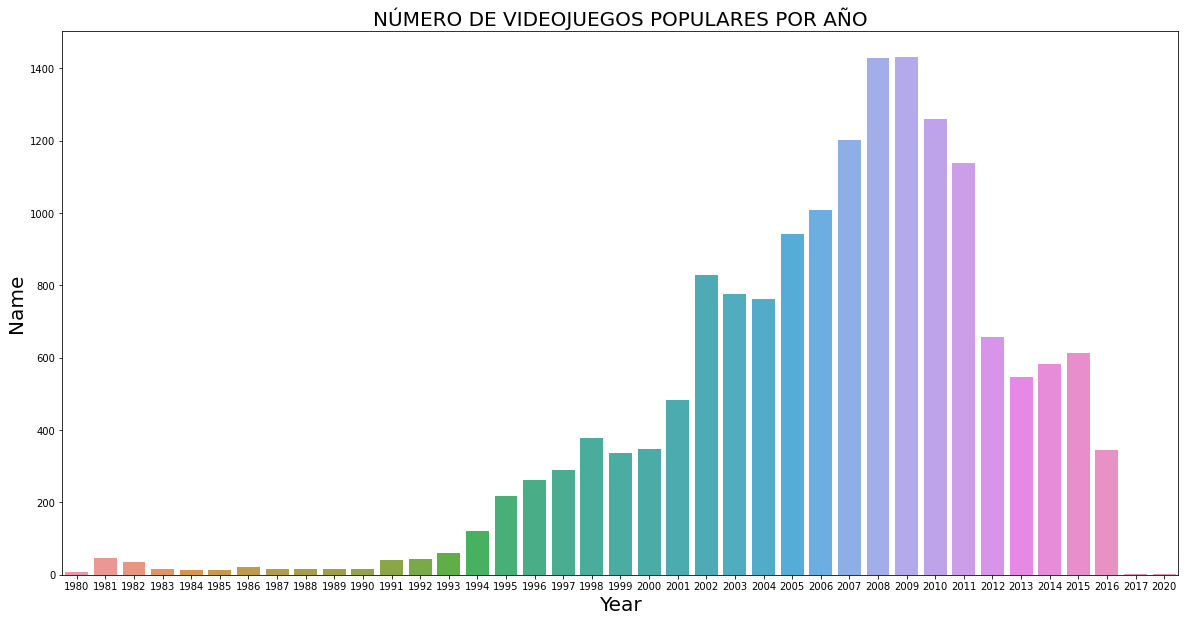

In [26]:
yearwisegame = df.groupby('Year')['Name'].count().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(
    x=yearwisegame['Year'].astype(int), 
    y=yearwisegame['Name']
).set_title('NÚMERO DE VIDEOJUEGOS POPULARES POR AÑO', fontsize = 20)
plt.ylabel('Name', fontsize = 20)
plt.xlabel('Year', fontsize = 20);

Se observa que entre el año 2007 y 2010, muchos juegos se popularizaron. En los años de 2007 y 2010 se dieron a conocer más de 1200 juegos distintos, pero la cifra alcanzada en el año 2008 y 2010 fue mucho más alta, popularizandose más de 1400 juegos.

### Ejercicio 9
Utilice un diagrama de barras donde se vean las ventas globales de videojuegos (en millones) por año.
#### Respuesta

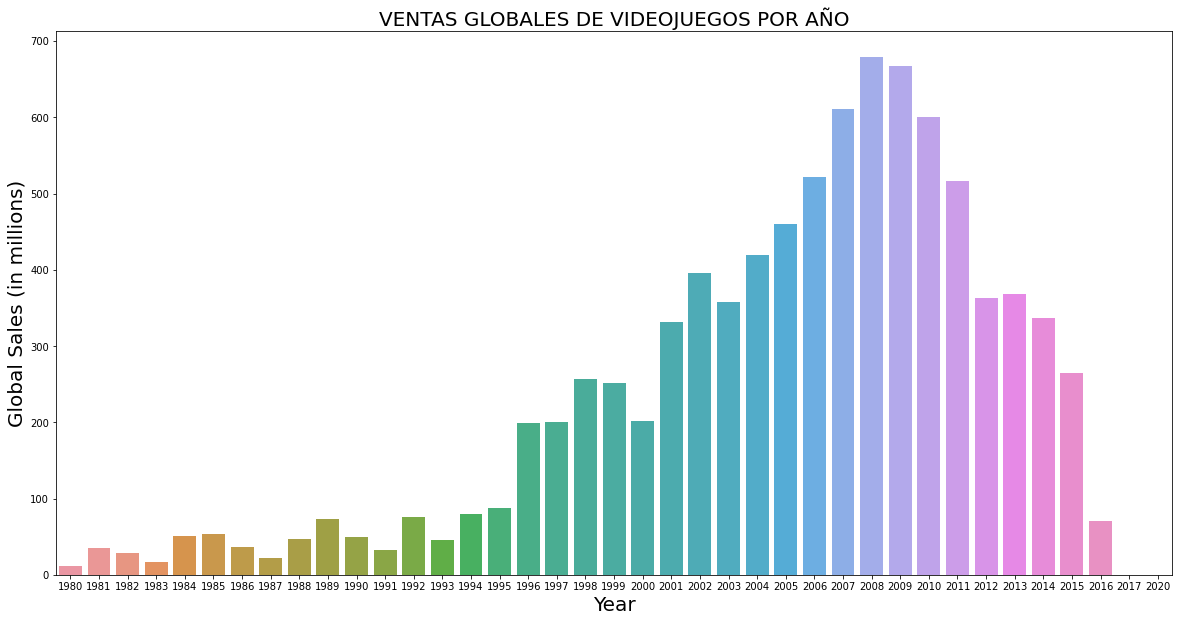

In [27]:
yearwisesale = df.groupby('Year')['Global_Sales'].sum().reset_index()
plt.figure(figsize=(20,10))
sns.barplot(
    x=yearwisesale['Year'].astype(int), 
    y=yearwisesale['Global_Sales']
).set_title('VENTAS GLOBALES DE VIDEOJUEGOS POR AÑO', fontsize = 20)
plt.ylabel('Global Sales (in millions)', fontsize = 20);
plt.xlabel('Year', fontsize = 20);

Entre el año 2007 y 2010 hubo una época de éxito para los videojuegos, alcanzando vender más de 600 millones de juegos dados a conocer en estos años. Es decir, los juegos de 2007 a 2010 son los más vendidos.

### Ejercicio 10
Grafique las ventas de videojuegos en cada región (Norteamérica, Europa, Japón, Resto del mundo) por año. También grafique las ventas totales en el mundo por año y determine cuál es la región con mayor número de ventas.
#### Respuesta

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


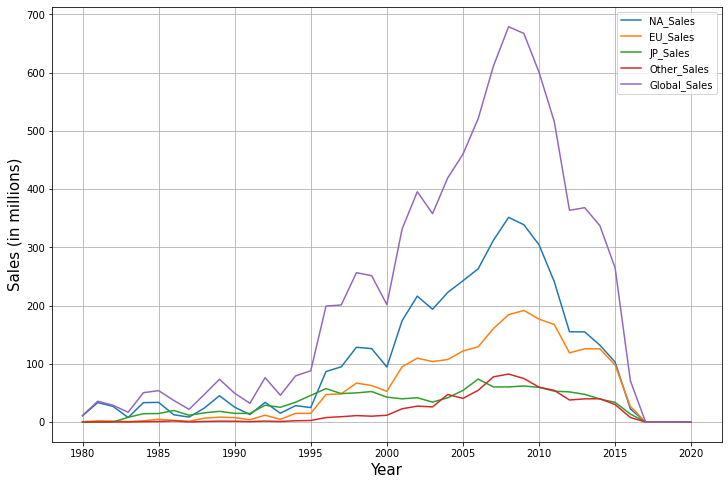

In [28]:
kindofsalesbyyear = df.groupby('Year')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum().reset_index()
kindofsalesbyyear.plot.line(figsize=(12, 8), grid='on', x = 'Year')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Sales (in millions)', fontsize = 15);

Las ventas por año siempre suelen ser mucho más altas en Norteamérica. Se ve gráficamente que la linea que representa las ventas en Norteamérica es más alta respecto a las demás regiones (EU, JP, Other).

###Ejercicio 11
Con el fin de verificar la anterior afirmación, muestre la matriz de correlación por medio de un mapa de calor.
#### Respuesta

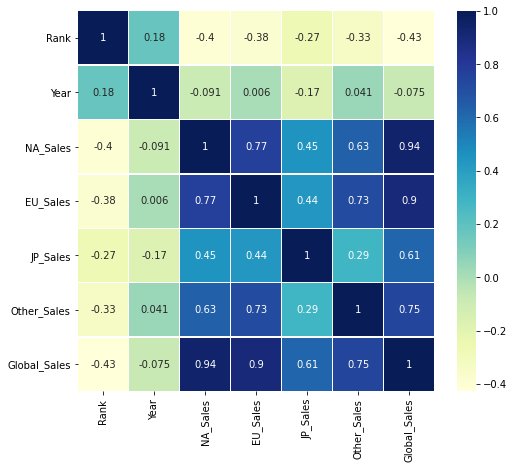

In [29]:
corr = df.corr()
corr
plt.figure(figsize=(8, 7))
sns.heatmap(corr, annot=True, linewidths=0.3, cmap="YlGnBu")

Las ventas de Norteamérica juegan un factor importante en las ventas globales, ya que la correlación entre ellas es de 0,94.
Además, las ventas europeas también juegan un factor importante con una correlación de 0,9. Esto indica entonces que gran parte de las ventas totales en todo el mundo son provenientes de Norteamérica y Europa.

### Ejercicio 12
¿Cuáles son los 5 editores de juego (publishers) que más juegos publican?
Mostrarlo por medio de un diagrama de barras.
#### Respuesta

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


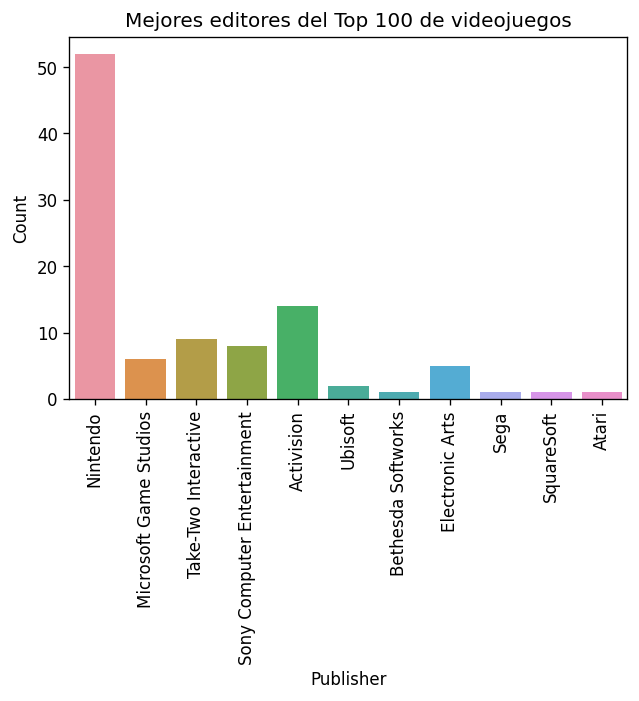

In [30]:
plt.figure(dpi = 120)
sns.countplot(df['Publisher'].head(100))
plt.xlabel('Publisher')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Mejores editores del Top 100 de videojuegos')
plt.show()

Nintendo es el editor de juego (publisher) con mayor número de juegos dentro del Top 100 del ranking teniendo más de 50 juegos en este top.
Se evidencia que Nintendo es un gran publisher y que domina el mercado de los videojuegos.

### Ejercicio 13
Muestre el top 10 de las mejores plataformas en todos los registros de la base de datos.
#### Respuesta

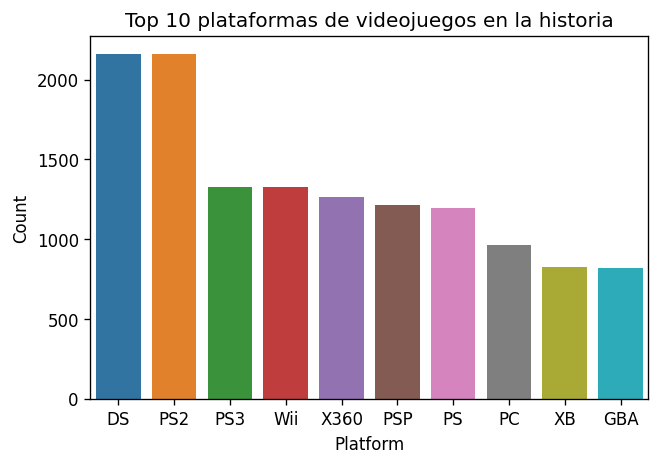

In [31]:
plt.figure(dpi=120)
a = df['Platform'].value_counts().head(10).reset_index()
sns.barplot(x = a['index'], y = a['Platform'])
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Top 10 plataformas de videojuegos en la historia')
plt.show()

Las mejores plataformas de videojuegos en esta base de datos son *DS* y *PS2*, ambos teniendo más de 2000 juegos dados a conocer. Estas dos plataformas son emblemáticas en este mercado y los datos lo muestran así.

### Ejercicio 14
Ahora, teniendo en cuenta el ejercicio anterior, analice el top 10 de mejores plataformas en la base de datos y compare con el top 10 de mejores plataformas en esta década [2011, 2020].
#### Respuesta

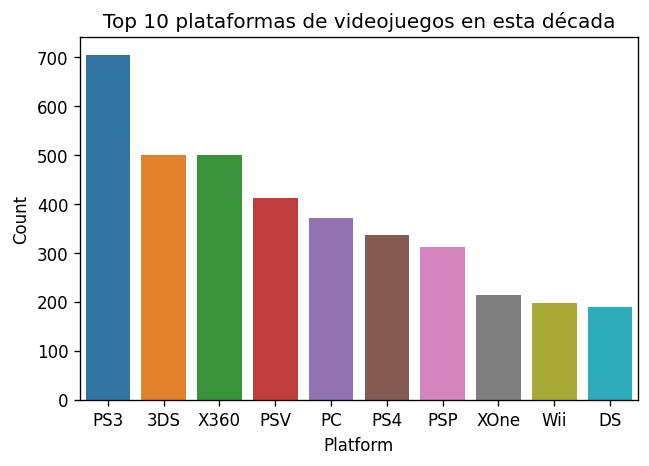

In [32]:
plt.figure(dpi=120)
a = df[df['Year'] >= 2011]['Platform'].value_counts().head(10).reset_index()
sns.barplot(x=a['index'], y=a['Platform'])
plt.xlabel('Platform')
plt.ylabel('Count')
plt.title('Top 10 plataformas de videojuegos en esta década')
plt.show()

La mejor plataforma de esta década es *PS3* que dio a conocer alrededor de 700 juegos de esta base de datos. 


Teniendo en cuenta esta década, se evidencia que la mejor plataforma es *PS3*, no obstante, si solo tenemos en cuenta cuántos juegos dió a conocer la plataforma sin el año, entonces los datos muestran que las mejores plataformas son *DS* y *PS2*, las cuales son plataformas con una gran historia en el mundo de los videojuegos.

### Ejercicio 15
Muestre un gráfico de los 10 primeros tipos de juegos con las ventas en cada región (NA, EU, JP, Other).
#### Respuesta

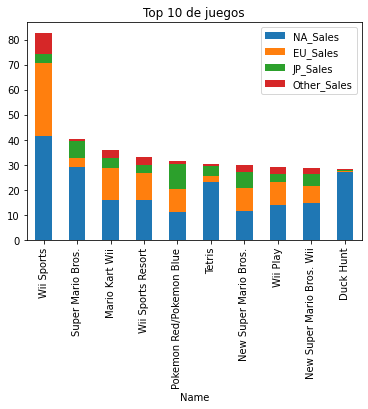

In [33]:
data = df.drop(columns=['Year', 'Global_Sales','Rank']).head(10)
data.plot.bar(x='Name', stacked=True, rot=90)
plt.title("Top 10 de juegos");

En este gráfico se puede ver que todos estos juegos tuvieron sus ventas principalmente en Norteamérica, situando a esta región como potencia mundial en la compra de videojuegos.